# 1.2 Control policies and open-loop control 

**1. For a point robot in 2-D, find a control policy u to make the robot move
in an ellipse shape. The ellipse’s major axis is equal to 4m, and the minor axis is equal to
2m. The major axis of the ellipse is aligned with the x-axis of the world frame. The center
of the ellipse is in the point [3, 2]<sup>T</sup>. The ellipse is rotated thirty degrees with respect to the
world coordinate frame**

## Initial 2D simulator setup

In [9]:
%pylab inline
from matplotlib import pyplot as plt

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['time']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


### Perfect sensor

In [10]:
def sense(x):
    return x

### Euler integration

In [11]:
def simulate(Δt, x, u):
    x += Δt * u
    return x

### Control policy

In [12]:
def control(t, y):
    ux = -2 * sqrt(3) * cos(t) + sin(t)
    uy = -2 * cos(t) - sqrt(3) * sin(t)
    return array([ux, uy])

### Running the simulator

In [13]:
tf = 2* pi
Δt = 0.1    # Time step
time = linspace(0.,tf, int(tf / Δt) + 1)  # Time interval


# Initial conditions
x = array([2., 2. + sqrt(3)])
x_log = [copy(x)]

for t in time:
    y = sense(x)
    u = control(t, y)    
    x = simulate(Δt, x, u)
    x_log.append(copy(x))
    
x_log = array(x_log)

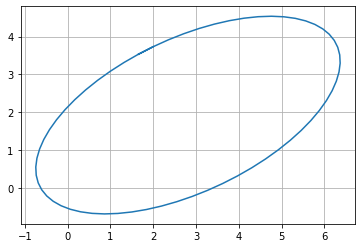

In [14]:
grid()
plot(x_log[:,0], x_log[:,1])

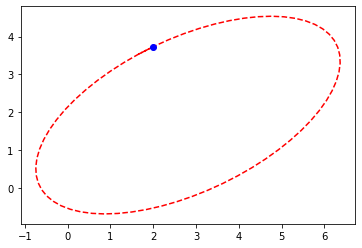

In [15]:
from matplotlib import animation
from JSAnimation import IPython_display    
from IPython.display import HTML
    


fig, ax = plt.subplots()

def animate(t):
    ax.clear()
    
    # Path
    plot(x_log[:,0], x_log[:,1], 'r--')
    
    # Initial conditions
    plot(x_log[t,0], x_log[t,1], 'bo')
    
    

anim = animation.FuncAnimation(fig, animate, frames=len(time), interval=60)

HTML(anim.to_jshtml())